In [23]:
import os
import glob
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import bokeh as bk

In [4]:
base_dir = '/Users/geo/london_bikes/London-bikes-analysis/'
year = "2018"
file = "{}_bikes.csv".format(year)
os.chdir(base_dir)

if os.path.exists(file):
    bikes_df = pd.read_csv(file)
else:
    weekly_files_dir = "data_{}".format(year)
    os.chdir('{}{}'.format('base_dir', 'weekly_files_dir'))
    files_names = [i for i in glob.glob('*.csv')]
    bikes_df = pd.concat([pd.read_csv(file) for file in files_names ]).reset_index(drop=True)
    bikes_df.to_csv( "../{}_bikes.csv".format(year), index=False, encoding='utf-8')

bikes_df.drop(['EndStation Logical Terminal'], axis=1, inplace=True)
print(bikes_df.head())

   Bike Id  Duration          End Date  EndStation Id  \
0     7457      1620  10/03/2018 12:41          807.0   
1    10899       180  07/03/2018 15:14          446.0   
2     4813      1020  08/03/2018 13:57          159.0   
3     8307       240  09/03/2018 08:57          578.0   
4     8433       240  13/03/2018 07:00          578.0   

                         EndStation Name  Rental Id        Start Date  \
0  Bevington Road West, North Kensington   73768697  10/03/2018 12:14   
1               York Hall, Bethnal Green   73703818  07/03/2018 15:11   
2         Great Marlborough Street, Soho   73729421  08/03/2018 13:40   
3       Hollybush Gardens, Bethnal Green   73749828  09/03/2018 08:53   
4       Hollybush Gardens, Bethnal Green   73822143  13/03/2018 06:56   

   StartStation Id                    StartStation Name  
0              647        Richmond Way, Shepherd's Bush  
1              722         Finnis Street, Bethnal Green  
2              797        Ossulston Street, 

In [9]:
bikes_df.columns = ['bike_id',
                    'duration',
                    'end_date',
                    'endstation_id',
                    'endstation_name',
                    'rental_id',
                    'start_date',
                    'startstation_id',
                    'startstation_name']

bikes_df['start_date'] = pd.to_datetime(bikes_df['start_date'], format = '%d/%m/%Y %H:%M')
bikes_df['end_date'] = pd.to_datetime(bikes_df['end_date'], format = '%d/%m/%Y %H:%M')
bikes_df = bikes_df.drop(bikes_df[bikes_df.start_date.dt.year != 2018].index)

print(bikes_df.shape)
print(bikes_df.head(3))

(10363536, 9)
   bike_id  duration            end_date  endstation_id  \
0     7457      1620 2018-03-10 12:41:00          807.0   
1    10899       180 2018-03-07 15:14:00          446.0   
2     4813      1020 2018-03-08 13:57:00          159.0   

                         endstation_name  rental_id          start_date  \
0  Bevington Road West, North Kensington   73768697 2018-03-10 12:14:00   
1               York Hall, Bethnal Green   73703818 2018-03-07 15:11:00   
2         Great Marlborough Street, Soho   73729421 2018-03-08 13:40:00   

   startstation_id              startstation_name  
0              647  Richmond Way, Shepherd's Bush  
1              722   Finnis Street, Bethnal Green  
2              797  Ossulston Street, Somers Town  


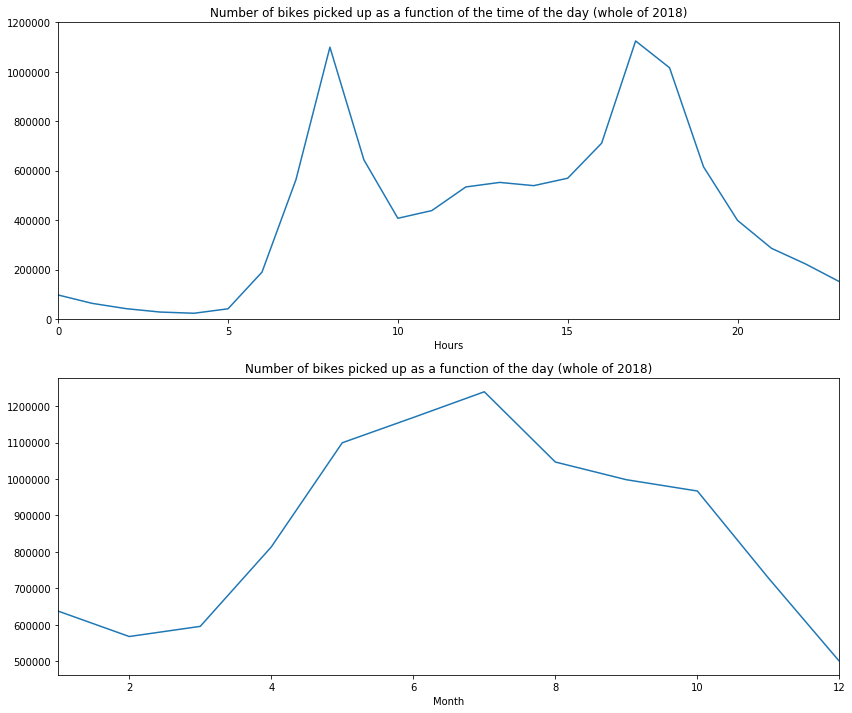

In [24]:
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(14,12))

ax1.set_ylim(0,1200000)
ax1.set_title('Number of bikes picked up as a function of the time of the day (whole of 2018)', fontsize=12)

#ax2.set_ylim(0,40000)
ax2.set_title('Number of bikes picked up as a function of the day (whole of 2018)', fontsize=12)

bikes_df.groupby(bikes_df['start_date'].rename('Hours').dt.hour).size().plot(ax=ax1)
bikes_df.groupby(bikes_df['start_date'].rename('Month').dt.month).size().plot(ax=ax2)

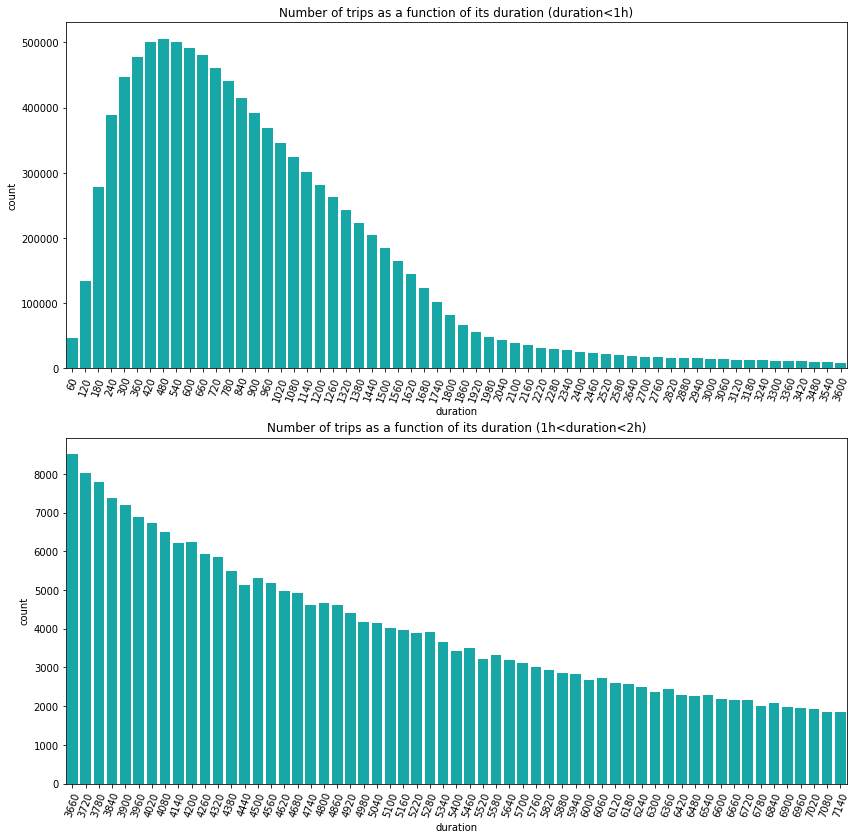

In [26]:
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(14,14))

sns.countplot(data = bikes_df[bikes_df['duration'] <= 3600],
              x = 'duration',
              ax = ax1,
              color = 'c').set_title('Number of trips as a function of its duration (duration<1h)', fontsize=12)

sns.countplot(data = bikes_df[(bikes_df['duration'] > 3600) & (bikes_df['duration'] < 7200)],
              x = 'duration',
              ax = ax2,
              color = 'c').set_title('Number of trips as a function of its duration (1h<duration<2h)', fontsize=12)

ax1.set_xticklabels(ax1.get_xticklabels(), rotation=70)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=70)
plt.show()

In [28]:
print(bikes_df['duration'].mean())
print(bikes_df['duration'].std())
print(bikes_df['duration'].median())
print(bikes_df[bikes_df['duration'] < 10000].shape)

1193.4120593588907
3469.0947234395408
840.0
(10302717, 9)
